In [363]:
%matplotlib notebook

import numpy as np
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [2]:
size = 4

In [3]:
data_path = '/home/nrogovoy/ProjectsData/seetree/6aa2d5f5-a173-4e66-8f6e-2ce39c956bbc/export'

In [8]:
with open(data_path + "/camera_data.pkl", 'rb') as f:
    camera_data = pickle.load(f)

ModuleNotFoundError: No module named 'seetree'

In [18]:
x = np.linspace(0, 6, 100)

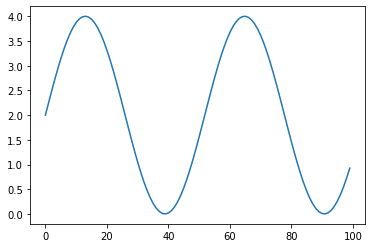

In [28]:
plt.plot(4 * np.sin(x) * np.cos(x) + 2)

In [29]:
angle = np.arange(360)

In [32]:
radius = 2

In [51]:
xs = 2 + radius * np.sin(angle * 2 * np.pi / 360)

In [52]:
ys = 2 + radius * np.cos(angle * 2 * np.pi / 360)

In [53]:
spherical = angle * 2 * np.pi / 360 * 2 * np.pi * radius
zs = 4 * np.sin(spherical) * np.cos(spherical) + 2

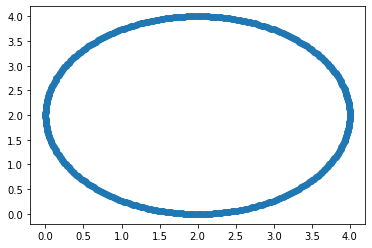

In [54]:
plt.scatter(xs, ys)

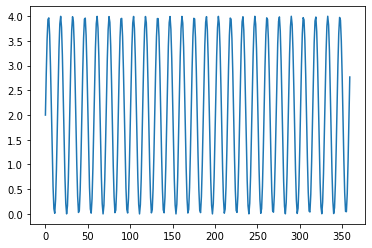

In [55]:
plt.plot(zs)

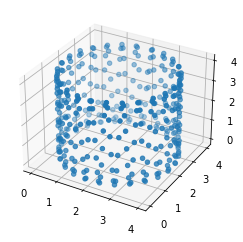

In [77]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs)

In [ ]:
angle = np.arange(360)

In [91]:
def trajectory(angle, radius):
    xs = radius * np.sin(angle * 2 * np.pi / 360)
    ys = radius * np.cos(angle * 2 * np.pi / 360)
    spherical = angle * 2 * np.pi / 360 * 2 * np.pi * radius
    zs = 4 * np.sin(spherical) * np.cos(spherical)
    return xs, ys, zs

In [114]:
def std_from_r(start_std, radius):
    return start_std * np.exp(2 * radius)

In [175]:
def simulate(angles, radius):
    xs, ys, zs = trajectory(angles, radius)
    std = std_from_r(0.001, radius)
    return xs + np.random.normal(0, std), ys + np.random.normal(0, std), zs + np.random.normal(0, std)

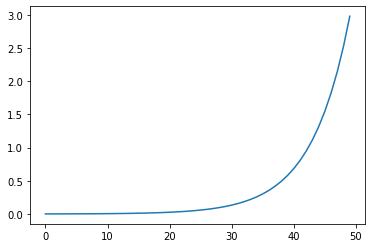

In [176]:
plt.plot(std(0.001, np.linspace(0, 2)))

In [177]:
points = []
for i in range(0, 360, 1):
    x, y, z = simulate(i, 2)
    points.append([x, y, z])

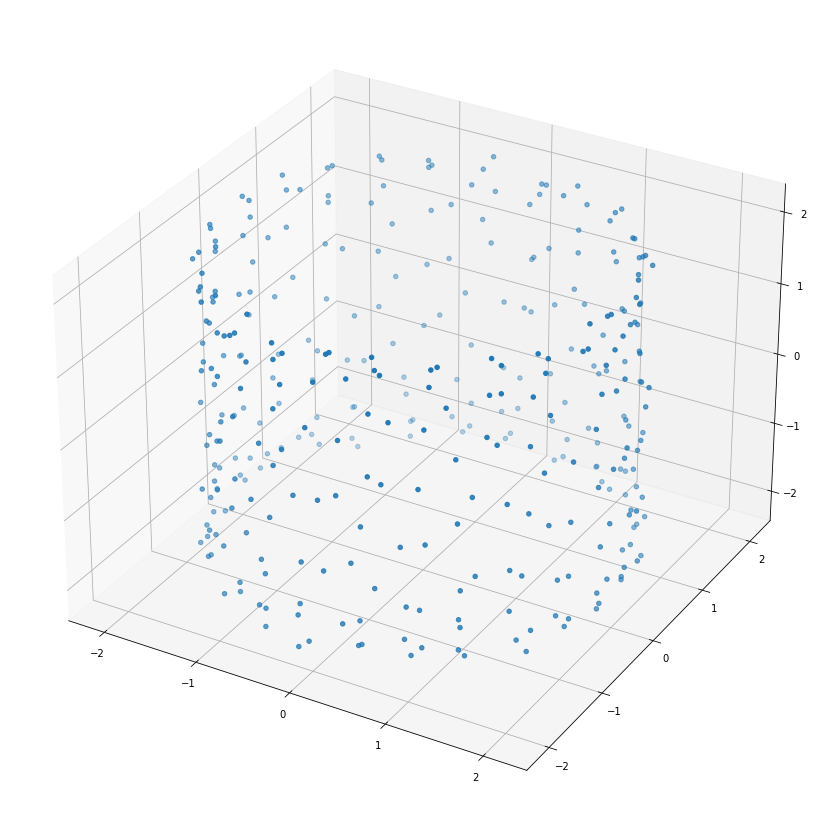

In [178]:
points = np.array(points)
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:, 0], points[:, 1], points[:, 2])

In [206]:
import math
# yaw, pitch, roll
def _calculate_R(w, phi, kappa):
    Rx = np.array([
        [1.0, 0.0, 0.0],
        [0.0, math.cos(w*math.pi/180), -math.sin(w*math.pi/180)],
        [0.0, math.sin(w*math.pi/180), math.cos(w*math.pi/180)]
    ], dtype=np.float)

    Ry = np.array([
        [math.cos(phi*math.pi/180), 0.0, math.sin(phi*math.pi/180)],
        [0.0, 1.0, 0.0],
        [-math.sin(phi*math.pi/180), 0.0, math.cos(phi*math.pi/180)]
    ], dtype=np.float)

    Rz = np.array([
        [math.cos(kappa*math.pi/180), -math.sin(kappa*math.pi/180), 0.0],
        [math.sin(kappa*math.pi/180), math.cos(kappa*math.pi/180), 0.0],
        [0.0, 0.0, 1.0]
    ], dtype=np.float)
    return np.matmul(np.matmul(Rx, Ry), Rz)

In [218]:
roll, pitch, yaw = rotation_traj(12)
world_mat = np.matrix([[0, 1, 0], [1, 0, 0], [0, 0, -1]])
R = _calculate_R(yaw, roll, pitch)
T = np.multiply(R, world_mat)

/tmp/ipykernel_1111756/1897831701.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ], dtype=np.float)
/tmp/ipykernel_1111756/1897831701.py:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ], dtype=np.float)
/tmp/ipykernel_1111756/1897831701.py:19: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence

matrix([[ 0.        , -0.02741213,  0.        ],
        [ 0.02741195,  0.        , -0.        ],
        [ 0.        ,  0.        , -0.99999332]])

In [399]:
def rotation_traj(angle):
    roll = 0
    pitch = 0
    yaw = 90 - angle
    return roll, pitch, yaw

In [400]:
def rpy_to_xyz(roll, pitch, yaw):
    x = -np.cos(yaw)*np.sin(pitch) * np.sin(roll)-np.sin(yaw)*np.cos(roll)
    y = -np.sin(yaw)* np.sin(pitch) * np.sin(roll)+np.cos(yaw)*np.cos(roll)
    z =  np.cos(pitch) * np.sin(roll)
#     x = np.cos(yaw) * np.cos(pitch)
#     y = np.sin(yaw) * np.cos(pitch)
#     z = np.sin(pitch)
    return x, y, z

In [401]:
views = []
for i in range(0, 360, 1):
    r, p, yaw = rotation_traj(i)
    R = _calculate_R(r, p, yaw)
#     x, y, z = rpy_to_xyz(r, p, yaw)
    views.append(R)

/tmp/ipykernel_1111756/1897831701.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ], dtype=np.float)
/tmp/ipykernel_1111756/1897831701.py:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ], dtype=np.float)
/tmp/ipykernel_1111756/1897831701.py:19: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence

In [410]:
view_vecs = []
for pos, R in zip(points, views):
    view = np.dot(R, [-1, 0, 0])
    view_vecs.append([pos, pos + view])

<IPython.core.display.Javascript object>


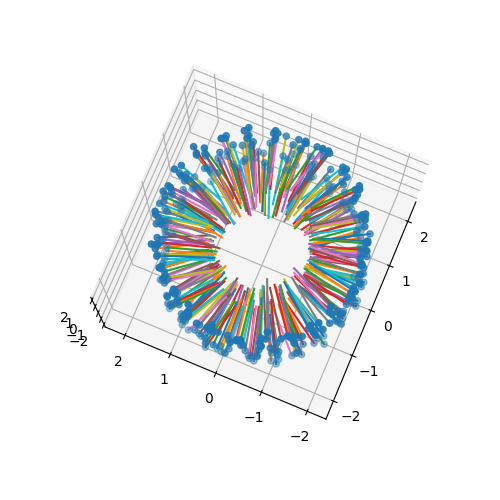

In [411]:
# views = np.array(views)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:, 0], points[:, 1], points[:, 2])
for item in view_vecs:
#     x, y, x = np.multiply()
    item = np.array(item)
    ax.plot(item[:, 0], item[:, 1], item[:, 2])

<IPython.core.display.Javascript object>


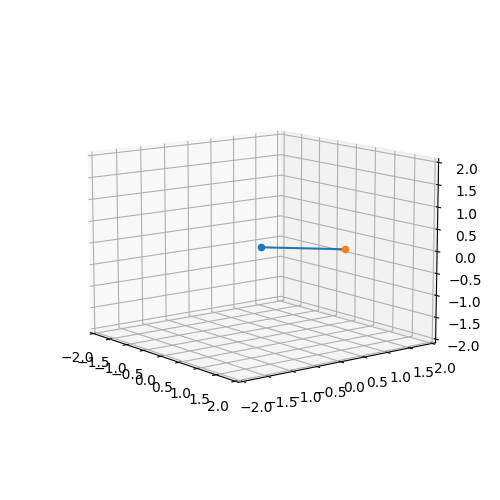

/tmp/ipykernel_1111756/1897831701.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ], dtype=np.float)
/tmp/ipykernel_1111756/1897831701.py:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ], dtype=np.float)
/tmp/ipykernel_1111756/1897831701.py:19: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence

In [372]:
# views = np.array(views)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(0, 0, 0)
pos = [1, 1, 0]
ax.scatter(pos[0], pos[1], pos[2])
ax.set_xlim3d([-2, 2])
ax.set_ylim3d([-2, 2])
ax.set_zlim3d([-2, 2])
R = _calculate_R(0, 0, 90)
view = np.dot(R, [-1, 1, 0])
shift = np.array([pos, pos + view])
ax.plot(shift[:, 0], shift[:, 1], shift[:, 2])

In [412]:
import pickle

In [414]:
with open('/home/nrogovoy/Downloads/mt_trajectory.pkl', 'rb') as f:
    data = pickle.load(f)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [415]:
data

In [417]:
traj_points = []
traj_re = []
for pose in data.collection:
    traj_points.append(pose.T)
    traj_re.append(pose.Re)

In [422]:
view_vecs = []
for pos, rot in zip(traj_points, traj_re):
    r, p, yaw = rot
    R = _calculate_R(r, p, yaw)
    view = np.dot(R, [-1, 0, 0])
    view_vecs.append([pos, pos + view])

/tmp/ipykernel_1111756/1897831701.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ], dtype=np.float)
/tmp/ipykernel_1111756/1897831701.py:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ], dtype=np.float)
/tmp/ipykernel_1111756/1897831701.py:19: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence

<IPython.core.display.Javascript object>


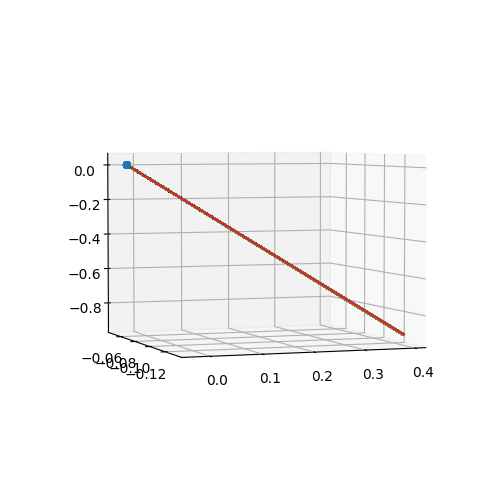

In [423]:
# views = np.array(views)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(traj_points[:, 0], traj_points[:, 1], traj_points[:, 2])
for item in view_vecs:
#     x, y, x = np.multiply()
    item = np.array(item)
    ax.plot(item[:, 0], item[:, 1], item[:, 2])